## Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

## Blue print

1. Check data shape and type.
2. Convert chracteristic values to numbers.
3. Split training dataset to *ourtrain* and *ourtest*.
4. Dimensionality reduction.
5. Try various models(logistic regression, decision tree, random forest, SVM, KNN, Naive Bayes).
6. Apply to the test dataset.

## Import Packages

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Show all columns in pandas DataFrame
pd.set_option("display.max_columns", None)

## 1. Explore Data

In [3]:
# Load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
print(train.shape)
train.head()

(900000, 33)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [ ]:
# Check data types and missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [ ]:
train.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765474,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


### - Drop f_27 for now

In [ ]:
f_27 = train["f_27"]
train = train.drop("f_27", axis=1)
train.shape

(900000, 32)

### - Split train dataset

In [ ]:
from sklearn.model_selection import train_test_split
# Drop "id" column as well
Xtr, Xte, Ytr, Yte = train_test_split(train.iloc[:, 1:-1], train["target"], test_size=0.33, random_state=42)

In [ ]:
Xtr.shape, Xte.shape, Ytr.shape, Yte.shape

((603000, 30), (297000, 30), (603000,), (297000,))

## 2. Dimensionality Reduction

In [ ]:
# Split based on the label
idx_1 = np.where(Ytr==1)
idx_0 = np.where(Ytr==0)

Xtr_1 = Xtr.iloc[idx_1]
Xtr_0 = Xtr.iloc[idx_0]

Ytr_1 = Ytr.iloc[idx_1]
Ytr_0 = Ytr.iloc[idx_0]

### 1) Try FLDA

In [ ]:
def FLDA_fit(A, B):
  # Covariance matrices of the two datasets
  cov1 = np.cov(A.T)
  cov2 = np.cov(B.T)
  cov_tot = (cov1+cov2)/2

  # Mean of the two datasets
  mean1 = A.mean(0)
  mean2 = B.mean(0)
  mean_diff = np.atleast_1d(mean1-mean2)

  return np.linalg.solve(cov_tot, mean_diff)

def FLDA_proj(X, w):
    Xproj = X.dot(w)
    Xproj1 = Xproj.iloc[idx_1]
    Xproj0 = Xproj.iloc[idx_0]
    return Xproj, Xproj1, Xproj0

In [ ]:
# Fit the data
flda_w = FLDA_fit(Xtr_1, Xtr_0)

# Project
Xtr_proj, Xtr_proj1, Xtr_proj0 = FLDA_proj(Xtr, flda_w)

This is not linearly separable.


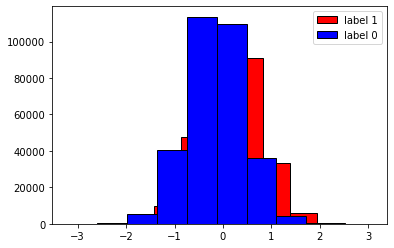

In [ ]:
plt.hist(Xtr_proj1, color='gold', ec='black', label="label 1")
plt.hist(Xtr_proj0, color='blueviolet', ec='black', label="label 0")
plt.legend()
print("This is not linearly separable.")

### 2) Try PCA

Text(0, 0.5, 'Expained ratio')

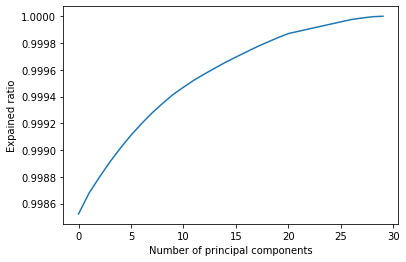

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(Xtr)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of principal components")
plt.ylabel("Expained ratio")

In [ ]:
# Try with 2 PC
pca = PCA(n_components=2)
pca.fit(Xtr)
Xtr_pca1 = pca.transform(Xtr_1)
Xtr_pca0 = pca.transform(Xtr_0)

This is not linearly separable.


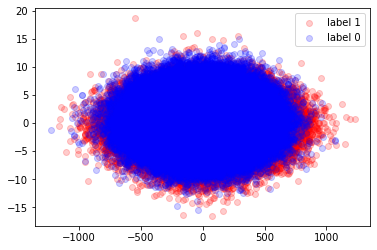

In [ ]:
plt.scatter(Xtr_pca1[:, 0], Xtr_pca1[:, 1], color='gold', alpha=0.2, label="label 1")
plt.scatter(Xtr_pca0[:, 0], Xtr_pca0[:, 1], color='blueviolet', alpha=0.2, label="label 0")
plt.legend()
print("This is not linearly separable.")

In [ ]:
# Try with 3 PC
pca = PCA(n_components=3)
pca.fit(Xtr)
Xtr_pca1 = pca.transform(Xtr_1)
Xtr_pca0 = pca.transform(Xtr_0)

In [ ]:
# 3D Plotting
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig3d = plt.figure(figsize = (10, 7))
ax3d = plt.axes(projection='3d')
cdict3d = {1: 'gold', 0: 'blueviolet'}

ax3d.scatter(Xtr_pca1[:, 0], Xtr_pca1[:, 1], Xtr_pca1[:, 2], c = 'gold', label = "label 1", s = 5)
ax3d.scatter(Xtr_pca0[:, 0], Xtr_pca0[:, 1], Xtr_pca0[:, 2], c = 'blueviolet', label = "label 0", s = 5)

ax3d.set_title("3 COMPONENTS")
ax3d.set_xlabel("PC1")
ax3d.set_ylabel("PC2")
ax3d.set_zlabel("PC3")

plt.legend() 
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

## 3. Predict

### 1) Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtr_pca)